In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
sub = 0 

movement_data = pd.read_csv('../data/data_movements_1.csv')

In [3]:
movement_data.loc[movement_data.state == "reach"]

,Unnamed: 0,trial,state,sample,time,x,y
333,333,0,reach,333,5.545218,0.076493,0.304492
334,334,0,reach,334,5.561728,0.091096,0.498022
335,335,0,reach,335,5.578794,0.107006,0.766844
336,336,0,reach,336,5.594738,0.117120,1.110269
337,337,0,reach,337,5.612744,0.107394,1.537546
...,...,...,...,...,...,...,...
78429,130,299,reach,78728,1312.173422,0.160459,5.717340
78430,131,299,reach,78729,1312.190398,0.299225,6.900439
78431,132,299,reach,78730,1312.207418,0.444022,7.897337
78432,133,299,reach,78731,1312.225397,0.618603,8.848580


<Axes: xlabel='x', ylabel='y'>

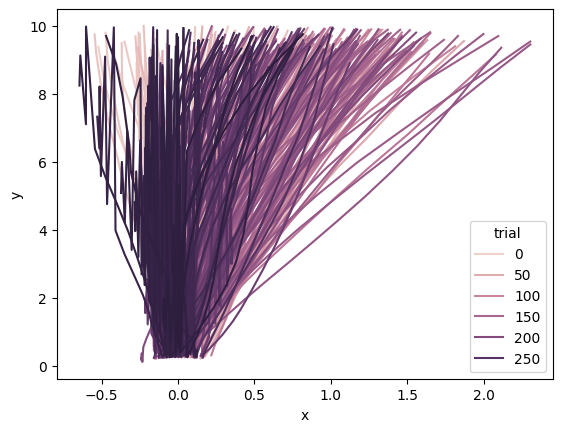

In [4]:
sns.lineplot(data = movement_data.loc[movement_data.state.isin(['reach'])], x = "x", y = "y", hue = "trial")

In [5]:
#Checking that there are 300 reach trials: conclusion = yes
movement_data.loc[(movement_data.trial == 299) & (movement_data.state == 'reach')]

,Unnamed: 0,trial,state,sample,time,x,y
78420,121,299,reach,78719,1312.025859,-0.016259,0.432628
78421,122,299,reach,78720,1312.040427,-0.049054,0.689829
78422,123,299,reach,78721,1312.057423,-0.084761,1.026142
78423,124,299,reach,78722,1312.073405,-0.099707,1.331878
78424,125,299,reach,78723,1312.090465,-0.093344,1.978015
78425,126,299,reach,78724,1312.106423,-0.072119,2.440480
78426,127,299,reach,78725,1312.124432,-0.018416,3.325959
78427,128,299,reach,78726,1312.142399,0.036008,4.132758
78428,129,299,reach,78727,1312.157394,0.099904,5.017183
78429,130,299,reach,78728,1312.173422,0.160459,5.717340


In [6]:
# convert x, y coordinates for 'reach' to polar and add these to the data as columns 
# function inspired from https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates 
def cart2pol(x, y):
    r = []
    theta = []
    for i in range(len(x)): 
        r.append(np.sqrt((x[i])**2 + (y[i])**2))
        theta.append(np.arctan2(y[i], x[i]))
    return(r, theta)

# create new subset of movement data only including reach state 
reach_data = movement_data.loc[movement_data.state == 'reach'].copy()

reach_x = reach_data.loc[(reach_data.state == 'reach'), 'x'].values
reach_y  = reach_data.loc[(reach_data.state == 'reach'), 'y'].values

r, theta = cart2pol(reach_x, reach_y)

In [7]:
# add r and theta to the reach dataset as columns 
reach_data['r'] = r
reach_data['theta'] = theta

In [8]:
reach_data

,Unnamed: 0,trial,state,sample,time,x,y,r,theta
333,333,0,reach,333,5.545218,0.076493,0.304492,0.313953,1.324674
334,334,0,reach,334,5.561728,0.091096,0.498022,0.506285,1.389881
335,335,0,reach,335,5.578794,0.107006,0.766844,0.774274,1.432151
336,336,0,reach,336,5.594738,0.117120,1.110269,1.116429,1.465697
337,337,0,reach,337,5.612744,0.107394,1.537546,1.541292,1.501062
...,...,...,...,...,...,...,...,...,...
78429,130,299,reach,78728,1312.173422,0.160459,5.717340,5.719591,1.542738
78430,131,299,reach,78729,1312.190398,0.299225,6.900439,6.906924,1.527460
78431,132,299,reach,78730,1312.207418,0.444022,7.897337,7.909810,1.514631
78432,133,299,reach,78731,1312.225397,0.618603,8.848580,8.870177,1.501000
